In [115]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [116]:
df = pd .read_csv('Employee.csv')

In [117]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [118]:
df.shape

(4653, 9)

In [119]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [120]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [121]:
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [122]:
df['ExperienceInCurrentDomain'].unique()

array([0, 3, 2, 5, 1, 4, 7, 6])

In [123]:
for col in df.columns:
    print(f'unique values in {col}',df[col].unique())

unique values in Education ['Bachelors' 'Masters' 'PHD']
unique values in JoiningYear [2017 2013 2014 2016 2015 2012 2018]
unique values in City ['Bangalore' 'Pune' 'New Delhi']
unique values in PaymentTier [3 1 2]
unique values in Age [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
unique values in Gender ['Male' 'Female']
unique values in EverBenched ['No' 'Yes']
unique values in ExperienceInCurrentDomain [0 3 2 5 1 4 7 6]
unique values in LeaveOrNot [0 1]


<Axes: xlabel='Education', ylabel='count'>

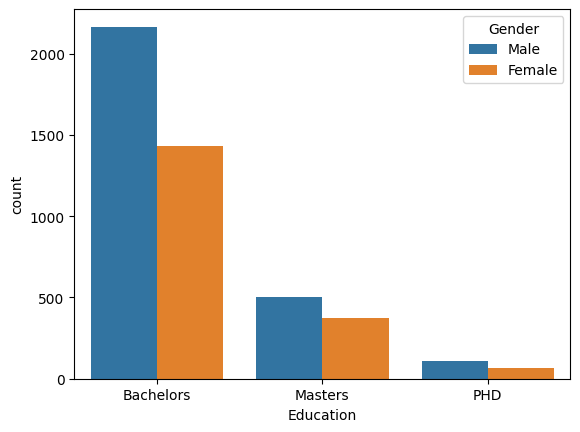

In [124]:
sns.countplot(x='Education',data=df,hue='Gender')

<Axes: xlabel='City', ylabel='count'>

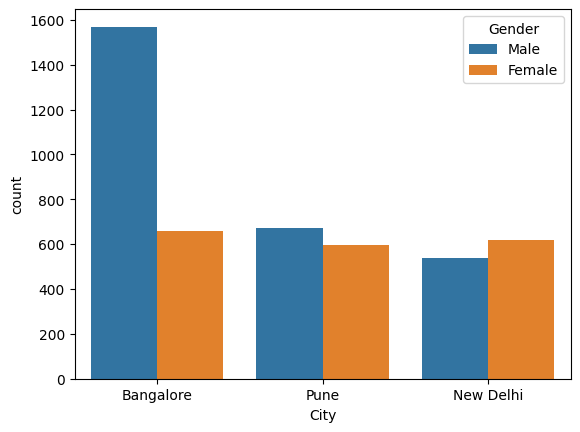

In [125]:
sns.countplot(x='City',data=df,hue='Gender')

<Axes: xlabel='LeaveOrNot', ylabel='count'>

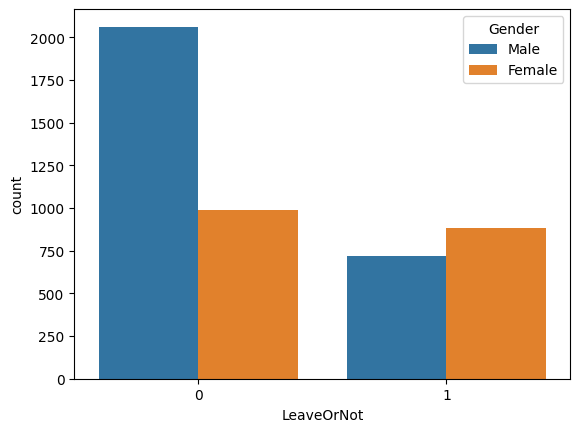

In [126]:
sns.countplot(x='LeaveOrNot',hue='Gender',data=df)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [128]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [129]:
X = df.drop(columns=['LeaveOrNot'],axis=1)
y = df['LeaveOrNot']

In [130]:
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,Bachelors,2017,Bangalore,3,34,Male,No,0
1,Bachelors,2013,Pune,1,28,Female,No,3
2,Bachelors,2014,New Delhi,3,38,Female,No,2
3,Masters,2016,Bangalore,3,27,Male,No,5
4,Masters,2017,Pune,3,24,Male,Yes,2
...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4
4649,Masters,2013,Pune,2,37,Male,No,2
4650,Masters,2018,New Delhi,3,27,Male,No,5
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2


In [131]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

In [132]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [133]:
st = StandardScaler()
encoder = OneHotEncoder()

In [134]:
df_final = pd.DataFrame(st.fit_transform(df_final),columns=st.get_feature_names_out())

In [135]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [136]:
X_encoded = encoder.fit_transform(df[['Education','City','Gender','EverBenched']]).toarray()

In [137]:
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Education','City','Gender','EverBenched']))

In [138]:
df_final = pd.concat([df, encoded_df], axis=1).drop(['Education','City','Gender','EverBenched'], axis=1)

In [139]:
df_final

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2013,1,28,3,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2014,3,38,2,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2016,3,27,5,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2017,3,24,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,4,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4649,2013,2,37,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4650,2018,3,27,5,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4651,2012,3,30,2,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [140]:
from  sklearn.model_selection import train_test_split

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [143]:
lr = LogisticRegression()
lr.fit(X_test,y_test)

ValueError: could not convert string to float: 'Bachelors'

In [ ]:
X_test